In [401]:
import pandas as pd
import matplotlib.pyplot as plt

In [402]:
df = pd.read_csv('../data/labeled-data.csv')

# Some insights about the data

In [403]:
df.head()

,emotion,video_id,author,label,confidence,labeled,predicted_label,comment,comment_nonsw
0,vui vẻ,_pMLRYGx9Is,@ottux2707,2.0,1.0,True,1.0,ai đó gì viu dhhp cho em vớiii,gì viu dhhp vớiii
1,vui vẻ,_pMLRYGx9Is,@minhchau3090,0.0,1.0,True,1.0,tính cả mình thì khóa mình có người trong bộ t...,khóa tài
2,vui vẻ,_pMLRYGx9Is,@yennhile8168,6.0,1.0,True,2.0,ê em là không lo xa đang tìm trường đhoc em xe...,ê không lo đang trường đhoc em video anh bcuoi v
3,vui vẻ,_pMLRYGx9Is,@tuantruong2080,6.0,1.0,True,0.0,anh làm p cho không được không,p không được không
4,vui vẻ,_pMLRYGx9Is,@johnnyphim5572,1.0,1.0,True,0.0,ftu giỏi lắm đó,ftu giỏi lắm


In [404]:
print(f"Number of rows: {len(df)}")
print(f"Number of labels: {len(df['label'].unique())}")

Number of rows: 5748
Number of labels: 8


# Check for wrong labels
We will randomly get 6 samples from labels, and relabel until there are no wrong labels

In [405]:
def get_random_samples_of_labels(df: pd.DataFrame, label: int, n: int) -> list:
    """
    Get n random samples of a specific label from the dataframe. Get a list of comments
    """
    # Filter the dataframe for the specified label
    filtered_df = df[df['label'] == label]

    # Randomly sample n rows from the filtered dataframe
    sampled_df = filtered_df.sample(n=n, random_state=42)
    sampled_df = sampled_df['comment']

    return sampled_df.tolist()

def load_labels(path: str) -> list:
    """
    Load labels from txt file and return as a list
    """
    with open(path, 'r') as file:
        labels = file.readlines()
    labels = [label.strip().split()[1] for label in labels]
    return labels

labels = load_labels('../artifacts/emotions.txt')
for label in df['label'].unique():
    print(f"\nLabel: {labels[int(label)]}")
    sampled_df = get_random_samples_of_labels(df, label, 3)
    for i, comment in enumerate(sampled_df):
        print(f"Sample {i+1}: {comment}")




Label: SAD
Sample 1: bữa cơm đau
Sample 2: de gea là ví dụ điển hình cho sự bảo thủ không chịu phát triển bản thân thêm để thích nghi với xu hướng bóng đá thế giới đã vậy còn ảo lương
Sample 3: tôi đâyy

Label: NEUTRAL
Sample 1: vợ hải nói truyện còn dễ gần hơn vợ thằng phú lê
Sample 2: x g không h
Sample 3: nam mô anh di đà phật

Label: CURIOUS
Sample 1: có thế giới gọi là anh và b anh là thế giới thực b là thế giới song song b có những con quái vật có thể trở về anh và chỉ có những con quái vật đó mới phân biệt được nhau nên mới có câu cuối video chết là điều sợ hãi lớn nhất đối với con người nên không ai dám tự hủy không ai trở về anh được nữ đã tìm ra được mâu thuẫn trong quy tắc và lời nói người hàng xóm nên đã quyết định tự hủy và trở về thế giới thực còn con mèo vì nó đã o còn là con người nữa nên nó không quay về được anh và nó đã hẹo
Sample 2: cậu vẽ oc cho mình được không ạ cái nhỏ tóc đỏ mà buộc hai bên mình đăng bên cđ ý
Sample 3: kịch bản lấy từ chatgpt à

Label: HAPPY
Sa

# Distributions

## By labels

C:\Users\tungq\AppData\Local\Temp\ipykernel_24708\1780421453.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(label_names, rotation=45)


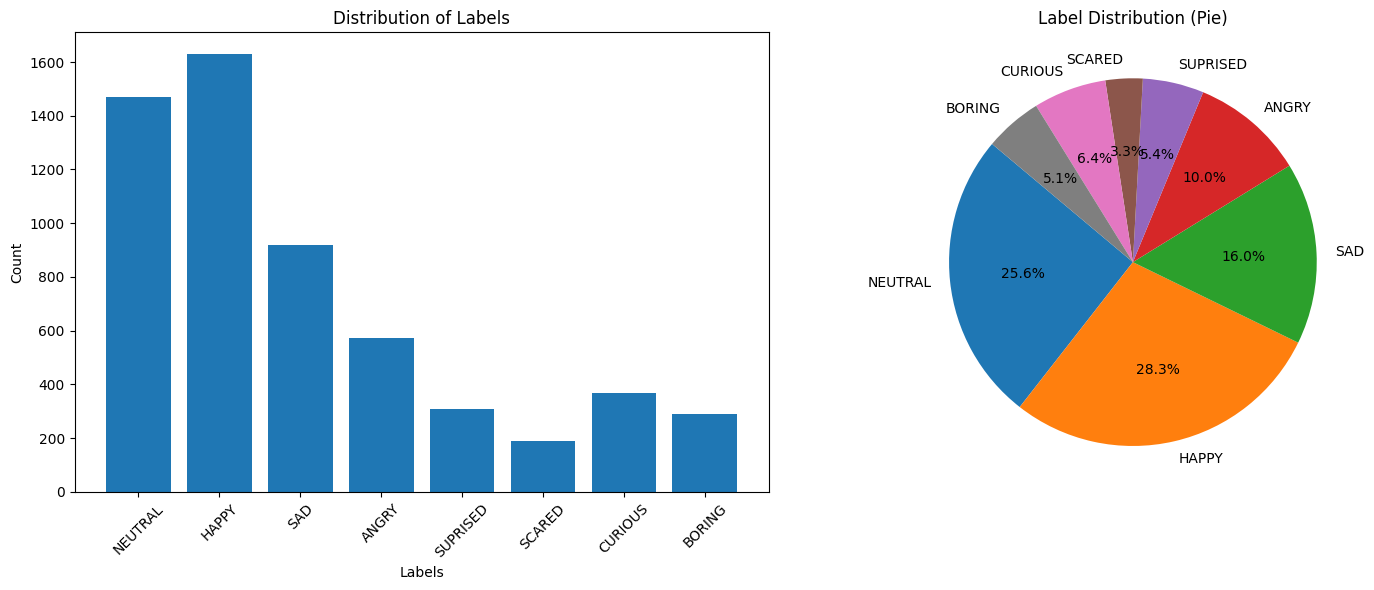

In [406]:
def plot_label_distribution_with_pie(df: pd.DataFrame, labels: list):
    """
    Plot the distribution of labels as a bar chart and a pie chart side by side.
    The x-axis of the bar chart uses the names from labels[].
    """
    label_counts = df['label'].value_counts().sort_index()
    label_names = [labels[int(idx)] for idx in label_counts.index]

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Bar chart
    axes[0].bar(label_names, label_counts.values)
    axes[0].set_title('Distribution of Labels')
    axes[0].set_xlabel('Labels')
    axes[0].set_ylabel('Count')
    axes[0].set_xticklabels(label_names, rotation=45)

    # Pie chart
    axes[1].pie(label_counts.values, labels=label_names, autopct='%1.1f%%', startangle=140)
    axes[1].set_title('Label Distribution (Pie)')

    plt.tight_layout()
    plt.show()

plot_label_distribution_with_pie(df, labels)

Distribute of lengths

In [407]:
word_counts = df['comment'].str.split().apply(len)
print(f"Maximum comment word count: {word_counts.max()}")
print(f"Minimum comment word count: {word_counts.min()}")


Maximum comment word count: 970
Minimum comment word count: 1


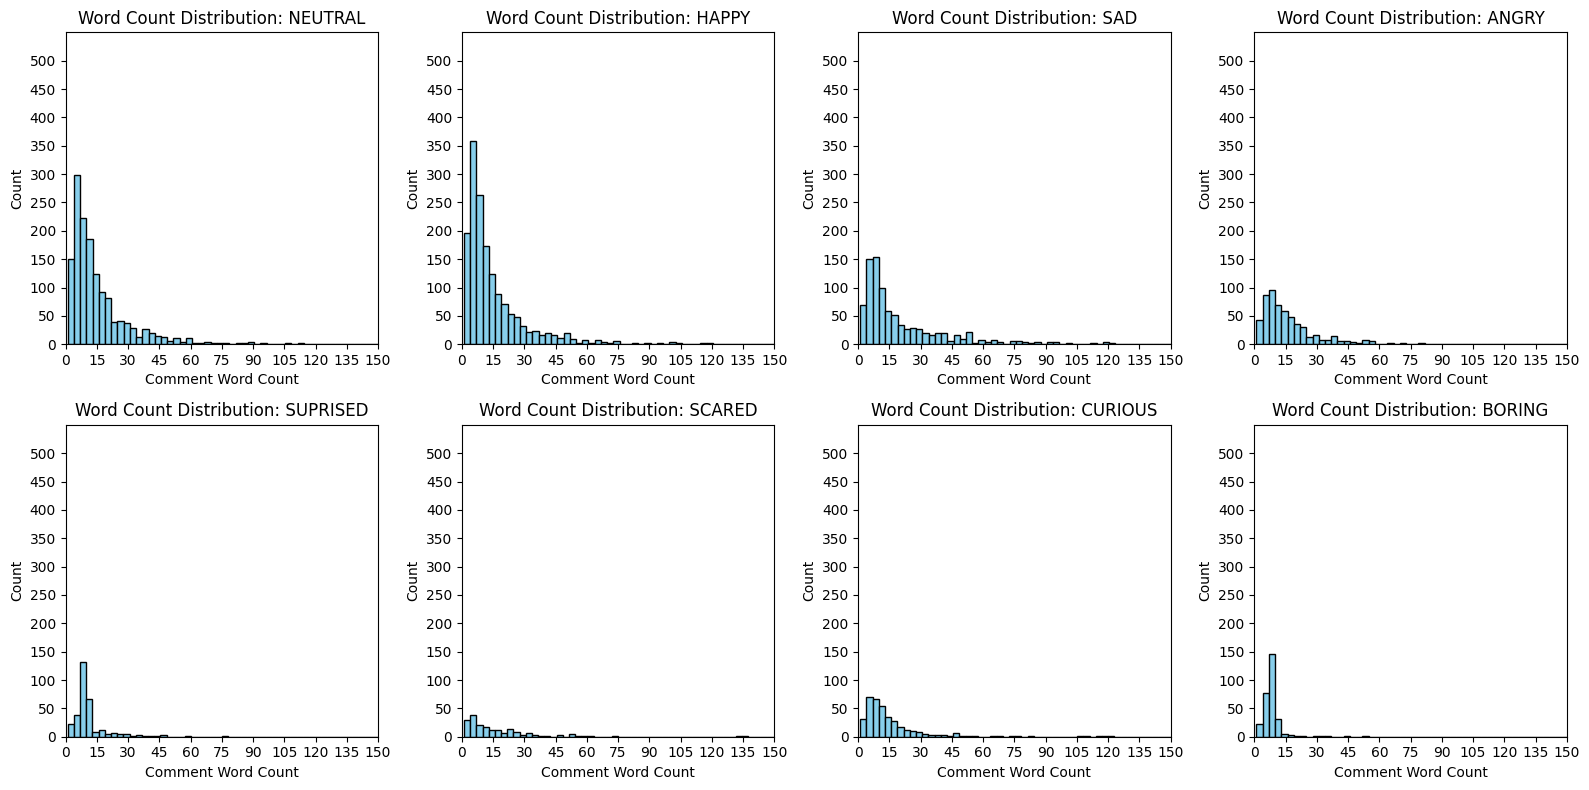

In [408]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

BIN_LENGTH = 3

for idx, label_name in enumerate(labels):
    ax = axes[idx]
    label_mask = df['label'] == idx
    # Use word count instead of character length
    lengths = df[label_mask]['comment'].str.split().apply(len)
    min_len = lengths.min()
    max_len = lengths.max()
    bins = int((max_len - min_len) / BIN_LENGTH) + 1

    ax.hist(lengths, bins=bins, color='skyblue', edgecolor='black')
    ax.set_title(f"Word Count Distribution: {label_name}")
    ax.set_xlabel("Comment Word Count")
    ax.set_ylabel("Count")
    ax.set_ylim(0, 550)
    ax.set_xlim(0, 150)  # Adjusted for word counts, change if needed
    ax.set_xticks(range(0, 151, 15))
    ax.set_yticks(range(0, 550, 50))

plt.tight_layout()
plt.show()

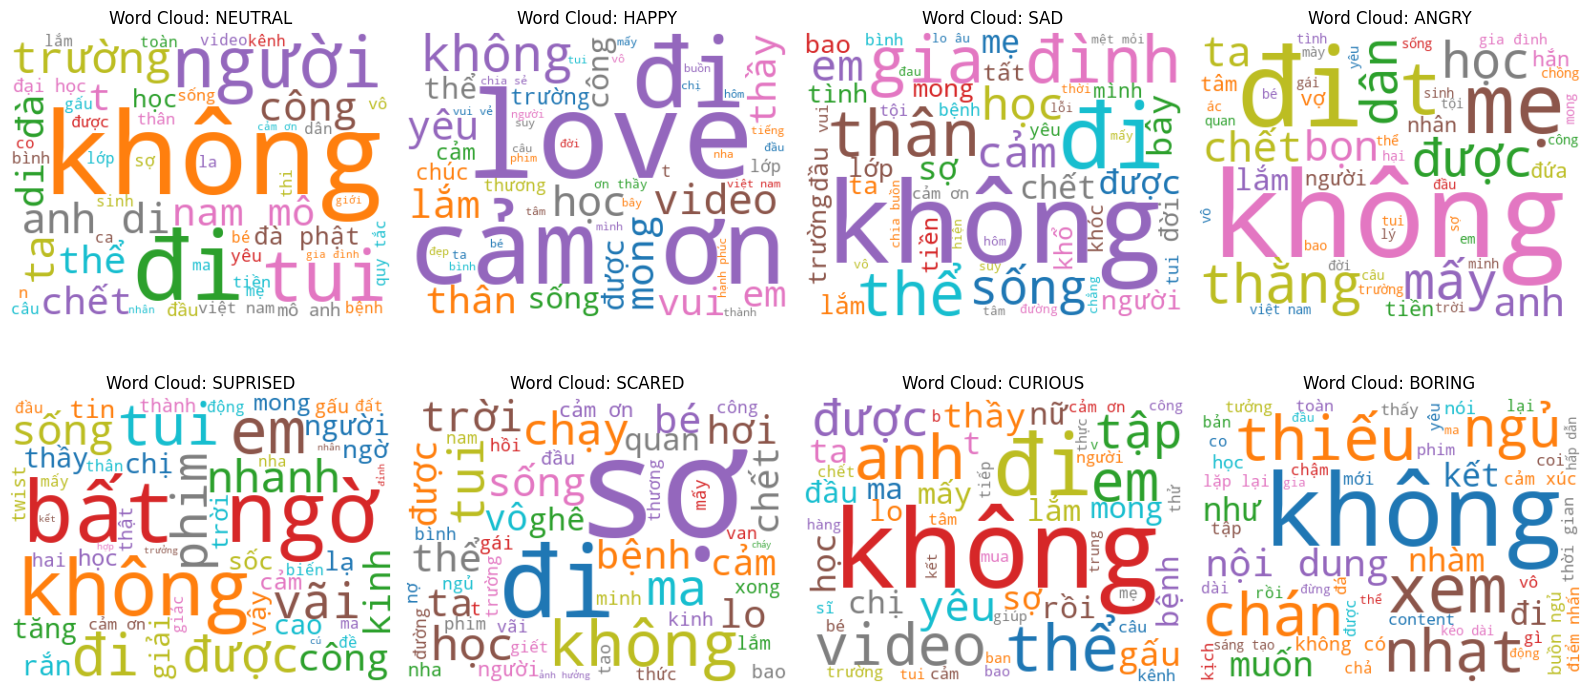

In [409]:
from wordcloud import WordCloud

fig_wc, axes_wc = plt.subplots(2, 4, figsize=(16, 8))
axes_wc = axes_wc.flatten()

for idx, label_name in enumerate(labels):
    ax = axes_wc[idx]
    text = " ".join(df[df['label'] == idx]['comment_nonsw'].astype(str))
    wc = WordCloud(width=400, height=300, background_color='white', colormap='tab10', max_words=50).generate(text)
    ax.imshow(wc, interpolation='bilinear')
    ax.set_title(f"Word Cloud: {label_name}")
    ax.axis('off')

plt.tight_layout()
plt.show()